### Exercice 3.1 : Classification de Sentiment avec Augmentation du Nombre de Neurones
**Objectif** : Créer un modèle simple de classification de texte pour classer les critiques de films en positives ou négatives. Commencez avec un petit nombre de neurones et augmentez progressivement ce nombre pour observer les effets sur la performance.

**Données** : Utilisez un sous-ensemble du jeu de données de critiques de films IMDB.

**Étapes** :
  1. Commencez par une couche `Embedding`, suivie d'une couche `Dense` avec 16 neurones.
  2. Entraînez le modèle et enregistrez la précision.
  3. Augmentez progressivement le nombre de neurones dans la couche `Dense` (par exemple, de 16 à 64 puis à 128) et observez comment la précision et le temps d'entraînement sont affectés.
  4. Tracez les résultats pour la précision et la perte, y compris pour les tests de validation.

Complétez le code ci-dessous.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load and preprocess the data
vocab_size = 10000  # Only consider the top 10k words
max_length = 256    # Pad/truncate all reviews to be 256 words

# Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

In [3]:
def build_model(dense_neurons):
    model = tf.keras.Sequential([
        layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
        layers.GlobalAveragePooling1D(),
        layers.Dense(dense_neurons, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
neuron_counts = [16, 64, 128]  # Different sizes for the Dense layer
results = {}
df = pd.DataFrame(columns = ['Compiled info', 'Numbers of neurons', 'accuracy', 'loss'])

for neurons in neuron_counts:
    print(f"\nTraining model with {neurons} neurons in the Dense layer")
    model = build_model(dense_neurons=neurons)

    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=512,
        validation_split=0.2,
        verbose=2
    )

    # Evaluate the model
    accuracy, loss = model.evaluate(x_test, y_test, verbose=2)
    results[neurons] = {'accuracy': accuracy, 'loss': loss, 'history': history}
    df.loc[len(df)] = {'Compiled info': model.get_compile_config(),
                       'Numbers of neurons': neurons, 'accuracy': accuracy, 'loss': loss}
    col = ['Compiled info', 'Numbers of neurons', 'accuracy', 'loss']
    with open("model_results_exercice_1.csv", "a") as f:
        try:
            df_tmp=pd.read_csv('model_results_exercice_1.csv')
            header = f.seek(0, 2) == 0
            df.to_csv("model_results_exercice_1.csv", header = header, columns=col)
        except Exception :
            df.to_csv("model_results_exercice_1.csv", columns=col)


Training model with 16 neurons in the Dense layer
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 - 1s - 22ms/step - accuracy: 0.6202 - loss: 0.6827 - val_accuracy: 0.6980 - val_loss: 0.6630
Epoch 2/5
40/40 - 0s - 10ms/step - accuracy: 0.7319 - loss: 0.6343 - val_accuracy: 0.7660 - val_loss: 0.5910
Epoch 3/5
40/40 - 0s - 10ms/step - accuracy: 0.7886 - loss: 0.5455 - val_accuracy: 0.8086 - val_loss: 0.4960
Epoch 4/5
40/40 - 0s - 10ms/step - accuracy: 0.8325 - loss: 0.4525 - val_accuracy: 0.8346 - val_loss: 0.4239
Epoch 5/5
40/40 - 0s - 10ms/step - accuracy: 0.8557 - loss: 0.3837 - val_accuracy: 0.8496 - val_loss: 0.3764
782/782 - 1s - 656us/step - accuracy: 0.8478 - loss: 0.3811

Training model with 64 neurons in the Dense layer
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 - 1s - 22ms/step - accuracy: 0.6173 - loss: 0.6847 - val_accuracy: 0.6986 - val_loss: 0.6600
Epoch 2/5
40/40 - 0s - 11ms/step - accuracy: 0.7512 - loss: 0.6078 - val_accuracy: 0.6830 - val_loss: 0.5807
Epoch 3/5
40/40 - 0s - 11ms/step - accuracy: 0.7922 - loss: 0.4881 - val_accuracy: 0.8142 - val_loss: 0.4367
Epoch 4/5
40/40 - 0s - 10ms/step - accuracy: 0.8583 - loss: 0.3802 - val_accuracy: 0.8326 - val_loss: 0.3802
Epoch 5/5
40/40 - 0s - 11ms/step - accuracy: 0.8709 - loss: 0.3259 - val_accuracy: 0.8626 - val_loss: 0.3327
782/782 - 1s - 655us/step - accuracy: 0.8605 - loss: 0.3365

Training model with 128 neurons in the Dense layer
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 - 1s - 22ms/step - accuracy: 0.6051 - loss: 0.6820 - val_accuracy: 0.6764 - val_loss: 0.6509
Epoch 2/5
40/40 - 0s - 10ms/step - accuracy: 0.7424 - loss: 0.5887 - val_accuracy: 0.8032 - val_loss: 0.4997
Epoch 3/5
40/40 - 0s - 11ms/step - accuracy: 0.8169 - loss: 0.4394 - val_accuracy: 0.8370 - val_loss: 0.3922
Epoch 4/5
40/40 - 0s - 11ms/step - accuracy: 0.8663 - loss: 0.3407 - val_accuracy: 0.8454 - val_loss: 0.3529
Epoch 5/5
40/40 - 0s - 11ms/step - accuracy: 0.8824 - loss: 0.2960 - val_accuracy: 0.8676 - val_loss: 0.3143
782/782 - 1s - 778us/step - accuracy: 0.8674 - loss: 0.3176


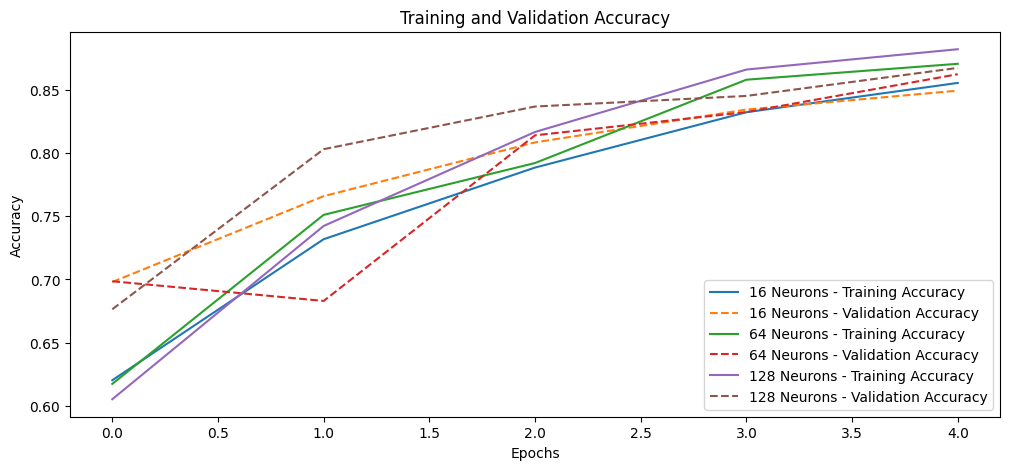

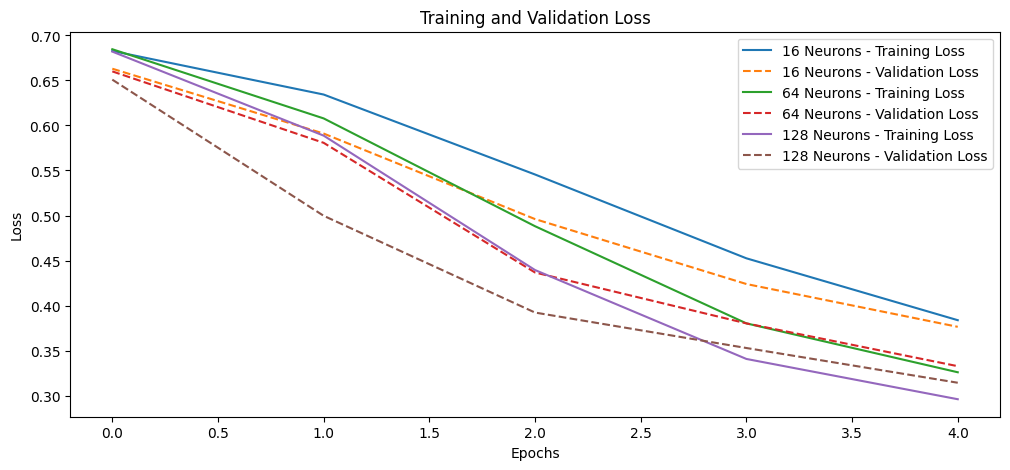

In [5]:
# Tracer les courbes pour la précision
plt.figure(figsize=(12, 5))
for neurons, result in results.items():
    history = result['history'].history  # Extraire l'historique
    plt.plot(history['accuracy'], label=f'{neurons} Neurons - Training Accuracy')
    plt.plot(history['val_accuracy'], linestyle='--',
             label=f'{neurons} Neurons - Validation Accuracy')

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tracer les courbes pour la perte
plt.figure(figsize=(12, 5))
for neurons, result in results.items():
    history = result['history'].history  # Extraire l'historique
    plt.plot(history['loss'], label=f'{neurons} Neurons - Training Loss')
    plt.plot(history['val_loss'], linestyle='--',
             label=f'{neurons} Neurons - Validation Loss')

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Exercice 3.2 : Classification d'Images Fine-grained avec Augmentation du Nombre de Neurones
**Objectif** : Créer un modèle de classification d'images de base pour classer des images de fleurs (`oxford_flowers102` - le *Oxford 102 Flower Dataset*). Commencez avec un petit nombre de neurones et augmentez-les progressivement pour observer les effets sur la performance.

**Données** : Utilisez le *Oxford 102 Flower Dataset*, qui contient des images de 102 catégories de fleurs.

**Étapes** :
  1. Commencez avec des couches `Conv2D` et `MaxPooling2D` pour l'extraction des caractéristiques des images.
  2. Ajoutez une couche `Flatten` pour convertir les cartes de caractéristiques 2D en un vecteur 1D.
  3. Ajoutez une couche `Dense` avec un petit nombre de neurones (par exemple, 32), suivie d'une couche de sortie.
  4. Entraînez le modèle et enregistrez la précision.
  5. Augmentez progressivement le nombre de neurones dans la couche `Dense` (par exemple, de 32 à 128 puis à 256) pour observer les changements dans la précision et le temps d'entraînement.

Complétez le code ci-dessous.

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [7]:
# Load the Oxford 102 Flower Dataset
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Split the dataset into training and testing
train_dataset = dataset['train']
test_dataset = dataset['test']

In [8]:
# Set image parameters
image_size = (150, 150)  # Resize images to this size
batch_size = 32

# Data preprocessing function to resize images and normalize pixel values
def preprocess_image(image, label):
    image = tf.image.resize(image, image_size)
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Apply preprocessing to the train and test datasets
train_dataset = train_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess_image).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [9]:
def create_model(num_neurons):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(num_neurons, activation='relu'),
        Dense(102, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
neurons_list = [32, 128, 256]
results = {}
for neurons in neurons_list:
    print(f"Training model with {neurons} neurons in the Dense layer")
    model = create_model(neurons)
    history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)
    accuracy, loss = model.evaluate(train_dataset, verbose=2)
    results[neurons] = {'accuracy': accuracy, 'loss': loss, 'history': history}

Training model with 32 neurons in the Dense layer
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/32 ━━━━━━━━━━━━━━━━━━━━ 21s 684ms/step - accuracy: 0.0000e+00 - loss: 4.6313

2024-11-14 11:33:38.494055: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.0139 - loss: 4.6319 - val_accuracy: 0.0280 - val_loss: 4.6021
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.0226 - loss: 4.5892 - val_accuracy: 0.0306 - val_loss: 4.4534
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.0170 - loss: 4.3966 - val_accuracy: 0.0220 - val_loss: 4.3564
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.0455 - loss: 4.1202 - val_accuracy: 0.0343 - val_loss: 4.2588
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.1088 - loss: 3.7691 - val_accuracy: 0.0576 - val_loss: 4.1765
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.2184 - loss: 3.2338 - val_accuracy: 0.0699 - val_loss: 4.1612
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.3267 - loss: 2.6284 - val_accuracy: 0.0662 - val_loss: 4.5312
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.4829 - loss: 2.0932 - val_accuracy: 0.0709 - va

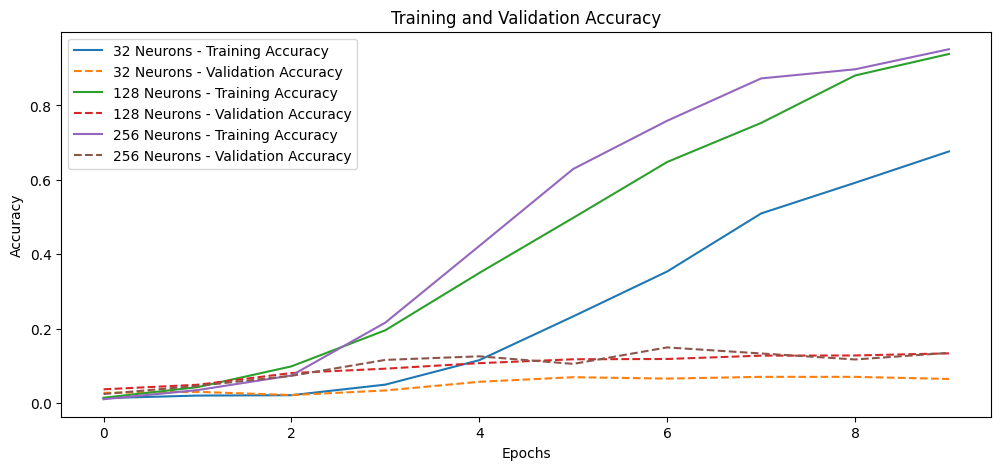

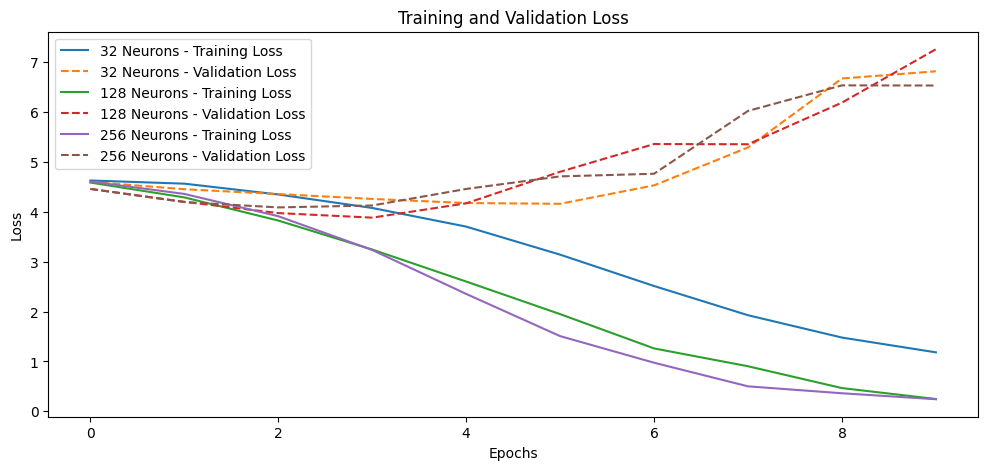

In [11]:
# Tracer les courbes pour la précision
plt.figure(figsize=(12, 5))

for neurons, result in results.items():
    history = result['history'].history  # Extraire l'historique
    plt.plot(history['accuracy'], label=f'{neurons} Neurons - Training Accuracy')
    plt.plot(history['val_accuracy'], linestyle='--',
            label=f'{neurons} Neurons - Validation Accuracy')

    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
plt.show()


# Tracer les courbes pour la perte
plt.figure(figsize=(12, 5))

for neurons, result in results.items():
    history = result['history'].history  # Extraire l'historique
    plt.plot(history['loss'], label=f'{neurons} Neurons - Training Loss')
    plt.plot(history['val_loss'], linestyle='--',
            label=f'{neurons} Neurons - Validation Loss')

    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
plt.show()

### Exercice 3.3 : **Étudier l'Influence de la Taille des Lots sur la Performance du Modèle**

**Objectif** : Cet exercice démontre comment différentes tailles de lots affectent la performance d'un modèle de réseau neuronal, y compris sa vitesse d'entraînement, sa perte, sa précision et sa capacité de généralisation.

**Jeu de données** : **Fashion MNIST** — un jeu de données contenant des images en niveaux de gris de 10 types de vêtements différents, avec 60 000 images d'entraînement et 10 000 images de test.

---

### Étapes :

#### 1. **Charger le Jeu de Données**
   - Utilisez `tensorflow.keras.datasets.fashion_mnist` pour charger le jeu de données.
   - Prétraitez les données en normalisant les valeurs des pixels dans l'intervalle `[0, 1]`.

#### 2. **Définir l'Architecture du Modèle**
   - Construisez un modèle simple de réseau neuronal convolutionnel (CNN) ou de réseau neuronal complètement connecté (FCNN).
   - Le modèle doit inclure :
     - Une couche d'entrée (pour gérer les images 28x28).
     - Une ou plusieurs couches cachées (par exemple, Dense, Conv2D).
     - Une couche de sortie avec 10 unités (une pour chaque catégorie de vêtement).
   - Utilisez **l'activation softmax** pour la couche de sortie, car il s'agit d'un problème de classification multiclasse.

#### 3. **Varier la Taille des Lots**
   - Expérimentez avec différentes tailles de lots (par exemple, 16, 32, 64, 128, 256).
   - Pour chaque taille de lot :
     - Entraînez le modèle pendant un nombre fixe d'époques (par exemple, 10 époques).
     - Enregistrez la perte d'entraînement, la perte de validation et la précision.

#### 4. **Entraîner le Modèle**
   - Entraînez le modèle pour chaque taille de lot et mesurez les éléments suivants :
     - **Temps d'entraînement** : Combien de temps il faut pour terminer une époque.
     - **Perte d'entraînement et de validation** : Suivez l'évolution de la perte pendant l'entraînement.
     - **Précision** : Suivez les performances du modèle sur les données d'entraînement et de validation.

#### 5. **Analyser les Résultats**
   - Comparez les éléments suivants :
     - **Temps d'entraînement** : Les tailles de lots plus grandes peuvent conduire à un entraînement plus rapide, mais elles pourraient aussi entraîner des rendements décroissants en termes de performance du modèle.
     - **Perte et précision** : Observez comment la taille du lot affecte la convergence de la fonction de perte et la précision sur les ensembles de données d'entraînement et de validation.
     - **Surapprentissage** : Vérifiez si des tailles de lots plus petites mènent à une meilleure généralisation (perte de validation plus faible) ou si des tailles de lots plus grandes entraînent un surapprentissage.

#### 6. **Tracer les Résultats**
   - Tracez des graphiques comparant la perte d'entraînement, la perte de validation et la précision pour différentes tailles de lots.
   - Tracez le temps d'entraînement pour différentes tailles de lots.

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [13]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to (28, 28, 1) to match the input shape expected by CNNs
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [14]:
# Modèle CNN pour Fashion MNIST
def build_model_cnn(dense_neurons):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(dense_neurons, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Modèle FCNN pour Fashion MNIST


def build_model_fcnn(dense_neurons):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(dense_neurons, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:

# Liste des tailles de neurones pour la couche Dense
neuron_counts = [16, 32, 64, 128, 256]
results = {}

# Entraîner le modèle pour chaque taille de neurones
for neurons in neuron_counts:
    print(f"\nEntraînement du modèle avec {neurons} neurones dans la couche Dense")
    model_cnn = build_model_cnn(dense_neurons=neurons)
    model_fcnn = build_model_fcnn(dense_neurons=neurons)

    # Entraîner le modèle
    history = model_cnn.fit(
        train_images, train_labels,
        epochs=10,
        validation_split=0.2,
        verbose=2
    )
    history_fcnn = model_fcnn.fit(
        train_images, train_labels,
        epochs=10,
        validation_split=0.2,
        verbose=2
    )

    # Évaluer le modèle
    loss, accuracy = model_cnn.evaluate(test_images, test_labels, verbose=2)
    loss_fcnn, accuracy_fcnn = model_fcnn.evaluate(test_images, test_labels, verbose=2)
    results[neurons] = {'accuracy': accuracy, 'loss': loss, 'history': history.history,'accuracy_fcnn': accuracy_fcnn, 'loss_fcnn': loss_fcnn, 'history_fcnn': history_fcnn.history}


Entraînement du modèle avec 16 neurones dans la couche Dense
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 - 7s - 4ms/step - accuracy: 0.8083 - loss: 0.5469 - val_accuracy: 0.8635 - val_loss: 0.3905
Epoch 2/10
1500/1500 - 6s - 4ms/step - accuracy: 0.8783 - loss: 0.3480 - val_accuracy: 0.8882 - val_loss: 0.3254
Epoch 3/10
1500/1500 - 7s - 4ms/step - accuracy: 0.8929 - loss: 0.3071 - val_accuracy: 0.8903 - val_loss: 0.3205
Epoch 4/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9007 - loss: 0.2826 - val_accuracy: 0.8989 - val_loss: 0.2986
Epoch 5/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9059 - loss: 0.2649 - val_accuracy: 0.8967 - val_loss: 0.2944
Epoch 6/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9121 - loss: 0.2487 - val_accuracy: 0.8972 - val_loss: 0.3006
Epoch 7/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9169 - loss: 0.2342 - val_accuracy: 0.8991 - val_loss: 0.2852
Epoch 8/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9198 - loss: 0.2230 - val_accuracy: 0.9028 - val_loss: 0.2840
Epoch 9/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9244 - loss: 0.2104 - val_accuracy: 0.9082 - val_loss: 0

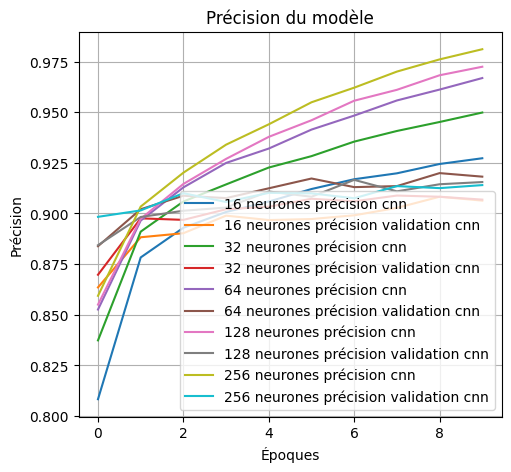

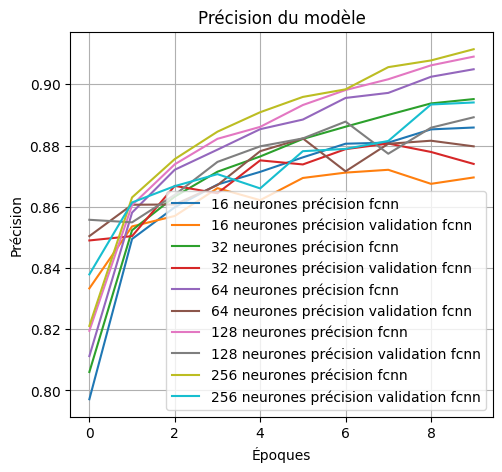

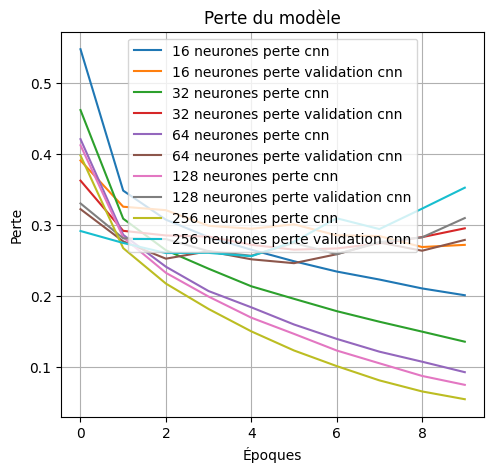

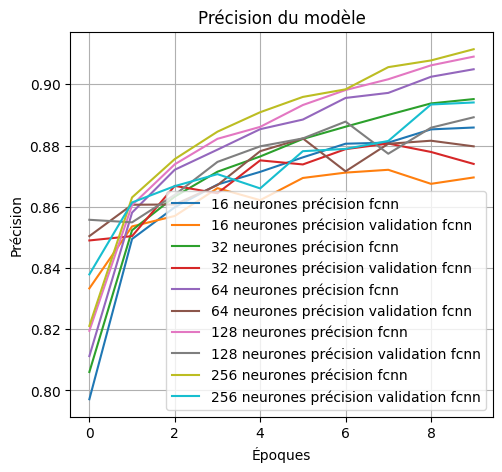

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for neurons, metrics in results.items():
    plt.plot(metrics['history']['accuracy'], label=f'{neurons} neurones précision cnn')
    plt.plot(metrics['history']['val_accuracy'], label=f'{neurons} neurones précision validation cnn')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for neurons, metrics in results.items():
    plt.plot(metrics['history_fcnn']['accuracy'],label=f'{neurons} neurones précision fcnn')
    plt.plot(metrics['history_fcnn']['val_accuracy'], label=f'{neurons} neurones précision validation fcnn')

plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for neurons, metrics in results.items():
    plt.plot(metrics['history']['loss'], label=f'{neurons} neurones perte cnn')
    plt.plot(metrics['history']['val_loss'], label=f'{neurons} neurones perte validation cnn')
plt.title('Perte du modèle')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for neurons, metrics in results.items():
    plt.plot(metrics['history_fcnn']['accuracy'],label=f'{neurons} neurones précision fcnn')
    plt.plot(metrics['history_fcnn']['val_accuracy'], label=f'{neurons} neurones précision validation fcnn')
plt.title('Précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

### Exercice 3.4 : Classification des Émotions avec le Jeu de Données CREMA-D

**Objectif** : Créer un modèle pour classifier les émotions à partir de clips audio de discours humain. Cet exercice se concentre sur l'identification des émotions telles que la colère, la joie, la tristesse et les tons neutres, en utilisant un prétraitement audio de base et un réseau neuronal convolutionnel.

**Jeu de données** : **CREMA-D** (Crowd-sourced Emotional Multimodal Actors Dataset) contient des clips audio d'acteurs exprimant six émotions : colère, dégoût, peur, joie, neutre et tristesse. Bien qu'il ne soit pas directement disponible dans `tensorflow_datasets`, il est suffisamment petit pour être prétraité et chargé efficacement dans TensorFlow.

---

### Étapes :

#### 1. **Chargement et Prétraitement des Données**
   - **Charger le Jeu de Données** :
     - Téléchargez le jeu de données CREMA-D depuis sa [source officielle](https://github.com/CheyneyComputerScience/CREMA-D).
     - Organisez les fichiers audio et les étiquettes d'émotions correspondantes.
   - **Traitement Audio** :
     - Convertissez les formes d'onde audio en spectrogrammes ou en mel-spectrogrammes pour chaque clip audio.
     - Normalisez les spectrogrammes et ajustez-les pour qu'ils aient une longueur constante, par exemple, 2 secondes.

#### 2. **Construire un Modèle Simple de Classification des Émotions**
   - **Couches Convolutionnelles** :
     - Commencez par une couche `Conv2D` pour apprendre les motifs spatiaux dans le spectrogramme.
     - Ajoutez des couches `Conv2D` supplémentaires et des couches `MaxPooling2D` pour capturer des caractéristiques de niveau supérieur.
   - **Couches Flatten et Dense** :
     - Aplatissez la sortie finale et faites-la passer à travers une ou deux couches `Dense` pour la classification.
     - Utilisez une activation softmax dans la couche `Dense` finale avec six unités de sortie, une pour chaque classe d'émotion.
   - **Compiler et Entraîner** :
     - Utilisez l'entropie croisée catégorielle comme fonction de perte et un optimiseur comme Adam.
     - Entraînez le modèle sur l'ensemble d'entraînement, en utilisant un ensemble de validation pour ajuster les performances.

#### 3. **Évaluation du Modèle**
   - **Précision** :
     - Évaluez la précision du modèle sur l'ensemble de test.
   - **Matrice de Confusion** :
     - Générez une matrice de confusion pour analyser quelles émotions sont bien classées et lesquelles sont fréquemment mal classées.

In [18]:
import os
import tensorflow as tf
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Define path to CREMA-D dataset (update path accordingly)
DATA_PATH = '/content/CREMA-D/AudioWAV'
LABELS = {'ANG': 0, 'DIS': 1, 'FEA': 2, 'HAP': 3, 'NEU': 4, 'SAD': 5}

ModuleNotFoundError: No module named 'librosa'

In [ ]:
def preprocess_audio(file_path, max_length=2.5, sr=16000):
    audio, _ = librosa.load(file_path, sr=sr)
    # Calculate the desired length in samples
    target_length = int(sr * max_length)
    # Adjust the audio to the desired length
    audio = librosa.util.fix_length(audio, size=target_length)
    # Convert audio to a mel-spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db


In [ ]:
# Load and preprocess data
def load_data(data_path, labels):
    data, targets = [], []
    for file_name in os.listdir(data_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(data_path, file_name)
            label_str = file_name.split('_')[2]  # e.g., "ANG", "DIS"
            if label_str in labels:
                spectrogram = preprocess_audio(file_path)
                data.append(spectrogram)
                targets.append(labels[label_str])
    return np.array(data), np.array(targets)

In [ ]:
# Load data
X, y = load_data(DATA_PATH, LABELS)
X = X[..., np.newaxis]  # Add channel dimension for Conv2D

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)